<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/dcnn/Algorithums/DCNN/DCNN_Leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install firebase-admin

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np
import os
from datetime import date,datetime
import json
import csv

In [1]:
firebase_count=1

In [3]:
dataset_path = '/content/drive/MyDrive/AYUSHVISION/working'

In [4]:
import firebase_admin

In [5]:
from firebase_admin import credentials,storage


In [6]:
from firebase_admin import firestore

In [399]:
epochs=10

In [400]:
document_id=f'{datetime.now().strftime("%Y_%m_%d_%H")}_{epochs}'
storageLocation=f'training/dcnn/leaves/'

In [401]:
working_dir=f'/content/drive/MyDrive/AYUSHVISION/ready/{document_id}'

# firebase

In [209]:

if firebase_count==1:
  cred = credentials.Certificate("/content/drive/MyDrive/AYUSHVISION/ServiceKey.json")
  firebase_admin.initialize_app(cred,{
    'storageBucket': 'ayush-vision-asw4gh.appspot.com'
})
firebase_count=firebase_count+1

In [210]:
db = firestore.client()

In [211]:
bucket = storage.bucket()

In [341]:
dcnn_ref = db.collection("training1").document('dcnn')
doc = dcnn_ref.get()

In [342]:
if not doc.exists:
  doc_ref= db.collection("training1").document('dcnn')
  doc_ref.set({'algorithum':'dcnn','version':'1','mode':'classification','url':'dcnn'})
else:
  doc_ref= dcnn_ref

### Colab

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [343]:
basicdata={'account':'thanumahee440@gmail.com','user':"Tharsha"}

In [402]:
basicdata['imageSize']=[224,224]
basicdata['project']=working_dir
basicdata['name']=document_id
basicdata['training_date']=datetime.now().strftime("%Y/%m/%d %H:%M:%S")
basicdata['filename']='DCNN_Leaves'


In [345]:
basicdata['names']=os.listdir(os.path.join(dataset_path,'train'))

In [403]:
today_ref=doc_ref.collection("Leaves").document(document_id)

In [404]:
today_ref.set(basicdata)

update_time {
  seconds: 1726129390
  nanos: 249260000
}

In [405]:
if not os.path.exists(working_dir):
  os.makedirs(working_dir)

In [350]:
train_data_dir = f'{dataset_path}/train'
train_datagen = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 11236 images belonging to 32 classes.


In [351]:
validation_data_dir = f'{dataset_path}/val'
validation_datagen = image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 1617 images belonging to 32 classes.


In [352]:
test_data_dir = f'{dataset_path}/test'
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 3212 images belonging to 32 classes.


In [406]:
# Build the CNN model
model=Sequential()
#Adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding dense layersa
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [407]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 19,283,680 (73.56 MB)

 Trainable params: 19,281,696 (73.55 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [408]:
args=json.loads(model.to_json())

In [409]:
plot_model(model, to_file= f'{working_dir}/dcnn{epochs}.jpg' , show_shapes=True, show_layer_names=True)

InvocationException: Program terminated with status: -6. stderr follows: newtrap: Trapezoid-table overflow 441
dot: trapezoid.c:84: newtrap: Assertion `0' failed.


In [357]:
blob = bucket.blob(f"{storageLocation+document_id}/train/model_summary{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/dcnn{epochs}.jpg')
blob.make_public()

In [410]:
today_training_colref=today_ref.collection('Train')

In [411]:
today_training_ref=today_training_colref.document('args')

In [412]:
today_training_ref.set(args)

update_time {
  seconds: 1726129466
  nanos: 805301000
}

In [361]:
today_training_summary_ref=today_training_colref.document('model_summary_plot')

In [362]:
today_training_summary_ref.set({
    'url':blob.public_url
})

update_time {
  seconds: 1726128183
  nanos: 29973000
}

In [413]:
# compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [414]:
todat_fit_train_ref=today_training_colref.document('fit')

In [415]:
todat_fit_train_ref.set({
    'epochs':epochs,
    'loss':"categorical_crossentropy",
    'optimizer':optimizer.get_config()

})

update_time {
  seconds: 1726128190
  nanos: 381700000
}

In [416]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,  # Number of epochs to wait for improvement
                               restore_best_weights=True)

In [417]:
# train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[early_stopping] )

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 60s 142ms/step - accuracy: 0.2366 - loss: 3.1360 - val_accuracy: 0.0550 - val_loss: 4.0046
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.5191 - loss: 1.6699 - val_accuracy: 0.0934 - val_loss: 8.0466
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 119ms/step - accuracy: 0.6363 - loss: 1.2070 - val_accuracy: 0.2344 - val_loss: 5.2101
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.6685 - loss: 1.0977 - val_accuracy: 0.1960 - val_loss: 3.8804
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 119ms/step - accuracy: 0.7768 - loss: 0.7024 - val_accuracy: 0.3630 - val_loss: 3.3270
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 119ms/step - accuracy: 0.8214 - loss: 0.5775 - val_accuracy: 0.2851 - val_loss: 4.0973
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.8650 - loss: 0.4150 - val_accuracy: 0.4484 - val_loss: 3.2854
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 120ms/step - accuracy: 0.8400 - loss: 0

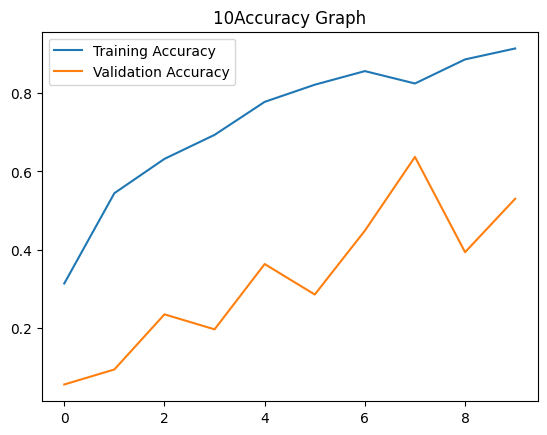

In [419]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title(f'{epochs}Accuracy Graph')
plt.savefig(f"{working_dir}/dcnn{epochs}_model_accuracy.jpg")
plt.show()

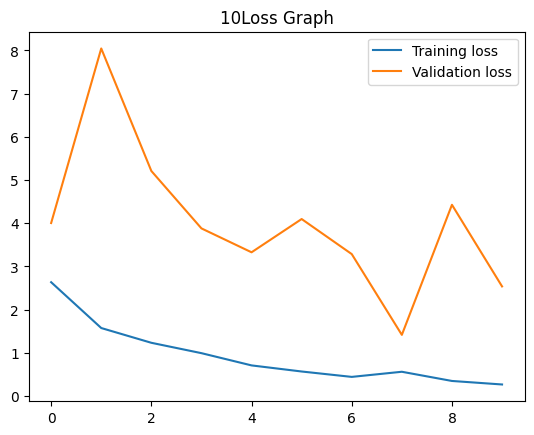

In [420]:
# Plot training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title(f'{epochs}Loss Graph')
plt.savefig(f"{working_dir}/dcnn{epochs}_model_loss.jpg")
plt.show()

In [421]:
blob = bucket.blob(f"{storageLocation+document_id}/val/training_plot{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/dcnn{epochs}_model_accuracy.jpg')
blob.make_public()

In [422]:
validationref=today_ref.collection('Val')

In [423]:
valhistory_ref=validationref.document('history')
valaccuracy_ref=validationref.document('accuracy_plot')

In [424]:
valhistory_ref.set(
    history.history
)

update_time {
  seconds: 1726130393
  nanos: 42874000
}

In [425]:
blobloss = bucket.blob(f"{storageLocation+document_id}/val/training_plot_loss{document_id}.jpg")
blobloss.upload_from_filename(f"{working_dir}/dcnn{epochs}_model_loss.jpg")
blobloss.make_public()

In [426]:
valaccuracy_ref.set({
    'accuracy_url':blob.public_url,
    'loss_url':blobloss.public_url
})

update_time {
  seconds: 1726130394
  nanos: 951646000
}

In [427]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.6489 - loss: 1.3463
Test Accuracy: 62.64%


In [428]:
testref=today_ref.collection('Test')

In [429]:
test_accuracy_loss=testref.document('test_accuracy_lost')
test_accuracy_loss.set({
    'accuracy':test_accuracy,
    'loss':test_loss
})

update_time {
  seconds: 1726130417
  nanos: 67533000
}

In [430]:
modelref=today_ref.collection('Model')

In [431]:
model.save(f'{working_dir}/dcnn_leaves_{epochs}.h5',)

In [432]:
model.save_weights(f'{working_dir}/dcnn_leaves_{epochs}.weights.h5')

In [433]:
savemodel=modelref.document('model')

In [434]:
blob = bucket.blob(f"{storageLocation+document_id}/model/dcnn_leaves_{epochs}.h5")
blob.upload_from_filename(f'{working_dir}/dcnn_leaves_{epochs}.h5')
blob.make_public()
h5model=blob.public_url

In [435]:
savemodel.set({'model':h5model})

update_time {
  seconds: 1726130435
  nanos: 566408000
}

In [436]:
blob = bucket.blob(f"{storageLocation+document_id}/model/dcnn_leaves_weights_{epochs}.weights.h5")
blob.upload_from_filename(f'{working_dir}/dcnn_leaves_{epochs}.weights.h5')
blob.make_public()
h5modelweights=blob.public_url

In [437]:
savemodel.update({'weights':h5modelweights})

update_time {
  seconds: 1726130440
  nanos: 497621000
}

In [ ]:
directory_path = 'sample/predict'
# List all files in the specified directory
files = os.listdir(directory_path)

# Iterate through the files and move those starting with 'dog_' to the 'dog' folder
for file in files:
    image_path = os.path.join(directory_path, file)

    if os.path.isfile(os.path.join(directory_path, file)):
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to match the model's expected input shape
        img_array /= 255.0  # Normalize pixel values to be in the range [0, 1]

        # Make a prediction
        prediction = model.predict(img_array)
        print(prediction)

        # `predictions` is a numpy array containing the predicted probabilities for each class
        # You can further process these predictions based on your specific use case
        # Assuming you have `predictions` from the previous code

        # Get the predicted class index
        predicted_class_index = np.argmax(prediction)

        # Define your class labels
        class_labels = ['cat', 'dog']

        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Get the confidence score for the predicted class
        confidence_score = prediction[0, predicted_class_index]

        # Display the results
        print(f'Predicted Class: {predicted_class_label}')
        print(f'Confidence Score: {confidence_score * 100:.2f}%')


1/1 [==============================] - 0s 125ms/step
[[9.99884605e-01 1.15348936e-04]]
Predicted Class: cat
Confidence Score: 99.99%
1/1 [==============================] - 0s 85ms/step
[[9.999260e-01 7.405674e-05]]
Predicted Class: cat
Confidence Score: 99.99%
1/1 [==============================] - 0s 82ms/step
[[0.4278868  0.57211316]]
Predicted Class: dog
Confidence Score: 57.21%
1/1 [==============================] - 0s 93ms/step
[[9.9997509e-01 2.4884128e-05]]
Predicted Class: cat
Confidence Score: 100.00%
1/1 [==============================] - 0s 83ms/step
[[0.52782446 0.4721755 ]]
Predicted Class: cat
Confidence Score: 52.78%
1/1 [==============================] - 0s 97ms/step
[[1.0000000e+00 1.2603996e-10]]
Predicted Class: cat
Confidence Score: 100.00%
1/1 [==============================] - 0s 94ms/step
[[0.7516124  0.24838759]]
Predicted Class: cat
Confidence Score: 75.16%
1/1 [==============================] - 0s 76ms/step
[[0.9614283  0.03857167]]
Predicted Class: cat
Confid